# Face Recognition

In [24]:
import math
import cv2
import numpy as np
import os

import torch
from torch.utils.serialization import load_lua
from torch.legacy import nn
import torchvision

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
plt.ion()

In [29]:
def getNameList(filePath):
    names = []
    with open(filePath) as f:
        names = [ line.strip() for line in f ]
    return names
8
idNames = sorted(map(lambda x: x.strip().split(".txt")[0].replace("_"," "),os.listdir("../data/faces_images")))
#idNames = getNameList("../data/faces/")
print "Number of identities = ", len(idNames)
print "List of the first 5 identities = ", idNames[:5]

Number of identities =  10
List of the first 5 identities =  ['A P J Abdul Kalam', 'A.J. Buckley', 'A.R. Rahman', 'Aamir Khan', 'Aaron Staton']


In [52]:
dataset = torchvision.datasets.ImageFolder("../data/faces_images/")
#dataset = load_lua("../data/faces/")
print "No. of images = ", len(dataset)
for imgName in dataset:
    print idNames[imgName[1]]

No. of images =  74
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A P J Abdul Kalam
A.J. Buckley
A.J. Buckley
A.J. Buckley
A.J. Buckley
A.J. Buckley
A.J. Buckley
A.J. Buckley
A.R. Rahman
A.R. Rahman
A.R. Rahman
A.R. Rahman
A.R. Rahman
A.R. Rahman
Aamir Khan
Aamir Khan
Aamir Khan
Aamir Khan
Aamir Khan
Aamir Khan
Aamir Khan
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Staton
Aaron Tveit
Aaron Tveit
Aaron Tveit
Aaron Tveit
Aaron Tveit
Aaron Tveit
Aaron Tveit
Aaron Yoo
Aaron Yoo
Aaron Yoo
Aaron Yoo
Aaron Yoo
Aaron Yoo
Aaron Yoo
Aaron Yoo
Abbie Cornish
Abbie Cornish
Abbie Cornish
Abbie Cornish
Abbie Cornish
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abel Ferrara
Abigail Breslin
Abigail Breslin
Abigail Breslin
Abigail Breslin
Abigail Breslin
Abigail Breslin
Abigail Breslin
Abigail Bre

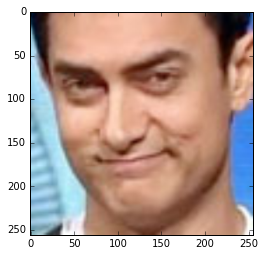

In [85]:
imgplot = plt.imshow(dataset[27][0])

In [88]:
# load the image using OpenCV
inputImg = np.array(dataset[0][0])

# re-scale the smaller dim (among width, height) to refSize
refSize, targetSize = 256, 224
imgRows, imgCols = inputImg.shape[0], inputImg.shape[1]
if imgCols < imgRows: resizedImg = cv2.resize(inputImg, (refSize, refSize * imgRows / imgCols))
else: resizedImg = cv2.resize(inputImg, (refSize * imgCols / imgRows, refSize))
    
# center-crop
oH, oW = targetSize, targetSize
iH, iW = resizedImg.shape[0], resizedImg.shape[1]
anchorH, anchorW = int(math.ceil((iH - oH)/2)), int(math.ceil((iW - oW) / 2))
croppedImg = resizedImg[anchorH:anchorH+oH, anchorW:anchorW+oW]

print croppedImg.shape

(224, 224, 3)


In [89]:
# convert shape from (height, width, 3) to (3, width, height)
channel_1, channel_2, channel_3 = croppedImg[:, :, 0], croppedImg[:, :, 1], croppedImg[:, :, 2]
croppedImg = np.empty([3, croppedImg.shape[0], croppedImg.shape[1]])
croppedImg[0], croppedImg[1], croppedImg[2] = channel_1, channel_2, channel_3

print croppedImg.shape

(3, 224, 224)


In [91]:
# subtract training mean
inputImg = inputImg.astype(float)
trainingMean = [129.1863, 104.7624, 93.5940]
for i in range(3): croppedImg[i] = croppedImg[i] - trainingMean[i]

In [97]:
# load pre-trained VGG-Face network
vggFace = load_lua("../../data/lab3/VGG_FACE_pyTorch_small.t7")
vggFace.modules[31] = nn.View(1, 25088)
vggFace = vggFace.cuda()
print vggFace

IOError: [Errno 2] No such file or directory: '../../data/lab3/VGG_FACE_pyTorch_small.t7'